# **DATA UNDERSTANDING**    : ***CMB_LCA DATASET***



# **1. 📥 DATA EXTRACTION**

### ✅ Import Libraries

In [ ]:
!pip install tcia_utils
!pip install requests pydicom matplotlib numpy
#requests → To access the TCIA API.
#pydicom → To handle DICOM medical images.
#matplotlib, numpy → For visualization and exploration.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 10.0 MB/s eta 0:00:00


In [ ]:
from tcia_utils import wordpress
from tcia_utils import nbia
from tcia_utils import pathdb
from tcia_utils import datacite

### 🎯 Acceding TCIA database via their API


In [ ]:
import requests

def get_collections():
    base_url = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getCollectionValues"
    response = requests.get(base_url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

collections = get_collections()
if collections:
    for collection in collections:
        print(collection)


{'Collection': '4D-Lung'}
{'Collection': 'ACRIN-FLT-Breast'}
{'Collection': 'ACRIN-NSCLC-FDG-PET'}
{'Collection': 'APOLLO'}
{'Collection': 'Anti-PD-1_Lung'}
{'Collection': 'BREAST-DIAGNOSIS'}
{'Collection': 'Breast-MRI-NACT-Pilot'}
{'Collection': 'C4KC-KiTS'}
{'Collection': 'CBIS-DDSM'}
{'Collection': 'CC-Radiomics-Phantom'}
{'Collection': 'CC-Radiomics-Phantom-2'}
{'Collection': 'CC-Radiomics-Phantom-3'}
{'Collection': 'CPTAC-CCRCC'}
{'Collection': 'CPTAC-CM'}
{'Collection': 'CPTAC-LSCC'}
{'Collection': 'CPTAC-LUAD'}
{'Collection': 'CPTAC-PDA'}
{'Collection': 'CPTAC-SAR'}
{'Collection': 'CPTAC-UCEC'}
{'Collection': 'CT COLONOGRAPHY'}
{'Collection': 'CT Lymph Nodes'}
{'Collection': 'DRO-Toolkit'}
{'Collection': 'ISPY1'}
{'Collection': 'LCTSC'}
{'Collection': 'LIDC-IDRI'}
{'Collection': 'Lung Phantom'}
{'Collection': 'Lung-Fused-CT-Pathology'}
{'Collection': 'Lung-PET-CT-Dx'}
{'Collection': 'LungCT-Diagnosis'}
{'Collection': 'Mouse-Astrocytoma'}
{'Collection': 'Mouse-Mammary'}
{'Collect

In [ ]:
def get_patient_ids(collection_name):
    base_url = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getPatient"
    params = {'Collection': collection_name}
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

collection_name = 'CMB-LCA'
patient_ids = get_patient_ids(collection_name)
if patient_ids:
    for patient in patient_ids:
        print(patient)


{'PatientID': 'MSB-09794', 'PatientName': 'MSB-09794', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientID': 'MSB-01499', 'PatientName': 'MSB-01499', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientID': 'MSB-04332', 'PatientName': 'MSB-04332', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientID': 'MSB-09027', 'PatientName': 'MSB-09027', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientID': 'MSB-00939', 'PatientName': 'MSB-00939', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientID': 'MSB-09117', 'PatientName': 'MSB-09117', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientID': 'MSB-05281', 'PatientName': 'MSB-05281', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientID': 'MSB-05388', 'PatientName': 'MSB-05388', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientID': 'MSB-01649', 'PatientName': 'MSB-01649', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientID': 'MSB-01459', 'PatientName': 'MSB-01459', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}
{'PatientI

In [ ]:
import requests

base_url = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getCollectionValues"

response = requests.get(base_url)
if response.status_code == 200:
    print(response.json())
else:
    print("Error:", response.status_code)


[{'Collection': '4D-Lung'}, {'Collection': 'ACRIN-FLT-Breast'}, {'Collection': 'ACRIN-NSCLC-FDG-PET'}, {'Collection': 'APOLLO'}, {'Collection': 'Anti-PD-1_Lung'}, {'Collection': 'BREAST-DIAGNOSIS'}, {'Collection': 'Breast-MRI-NACT-Pilot'}, {'Collection': 'C4KC-KiTS'}, {'Collection': 'CBIS-DDSM'}, {'Collection': 'CC-Radiomics-Phantom'}, {'Collection': 'CC-Radiomics-Phantom-2'}, {'Collection': 'CC-Radiomics-Phantom-3'}, {'Collection': 'CPTAC-CCRCC'}, {'Collection': 'CPTAC-CM'}, {'Collection': 'CPTAC-LSCC'}, {'Collection': 'CPTAC-LUAD'}, {'Collection': 'CPTAC-PDA'}, {'Collection': 'CPTAC-SAR'}, {'Collection': 'CPTAC-UCEC'}, {'Collection': 'CT COLONOGRAPHY'}, {'Collection': 'CT Lymph Nodes'}, {'Collection': 'DRO-Toolkit'}, {'Collection': 'ISPY1'}, {'Collection': 'LCTSC'}, {'Collection': 'LIDC-IDRI'}, {'Collection': 'Lung Phantom'}, {'Collection': 'Lung-Fused-CT-Pathology'}, {'Collection': 'Lung-PET-CT-Dx'}, {'Collection': 'LungCT-Diagnosis'}, {'Collection': 'Mouse-Astrocytoma'}, {'Collecti

In [ ]:
def get_patient_ids(collection_name):
    url = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getPatient"
    params = {"Collection": collection_name}
    response = requests.get(url, params=params)
    return response.json() if response.status_code == 200 else None

patients = get_patient_ids("CMB-LCA")
print(patients[:5])  # Show first 5 patients


[{'PatientID': 'MSB-09794', 'PatientName': 'MSB-09794', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}, {'PatientID': 'MSB-01499', 'PatientName': 'MSB-01499', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}, {'PatientID': 'MSB-04332', 'PatientName': 'MSB-04332', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}, {'PatientID': 'MSB-09027', 'PatientName': 'MSB-09027', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}, {'PatientID': 'MSB-00939', 'PatientName': 'MSB-00939', 'PatientSex': 'O', 'Collection': 'CMB-LCA'}]


In [ ]:
def get_series(patient_id):
    url = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getSeries"
    params = {"PatientID": patient_id}
    response = requests.get(url, params=params)
    return response.json() if response.status_code == 200 else None

# Example: Get series for the first patient
series_list = get_series(patients[0]['PatientID'])
print(series_list[:5])  # Show first 5 series


[{'PatientID': 'MSB-09794', 'StudyInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1.25686054544454293379157239791075201336', 'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1.32694968050904497866370466788624167121', 'Modality': 'MR', 'SeriesDate': '1958-06-22', 'SeriesDescription': 'AX VIBE POST (90 SEC. DELAY)', 'BodyPartExamined': 'ABDOMEN', 'SeriesNumber': '15.000000', 'Collection': 'CMB-LCA', 'Manufacturer': 'SIEMENS', 'ManufacturerModelName': 'Espree', 'SoftwareVersions': 'syngo MR B19', 'Visibility': '1', 'ImageCount': 72}, {'PatientID': 'MSB-09794', 'StudyInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1.25686054544454293379157239791075201336', 'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1.10173809488222112486614665825286330755', 'Modality': 'MR', 'SeriesDate': '1958-06-22', 'SeriesDescription': 'AX VIBE POST (8MIN DELAY)', 'BodyPartExamined': 'ABDOMEN', 'SeriesNumber': '18.000000', 'Collection': 'CMB-LCA', 'Manufacturer': 'SIEMENS', 'ManufacturerModelName': 'Espree', 'SoftwareVersions': 'syngo M

In [ ]:
import requests

collection_name = "CMB-LCA"
url = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getSeries"
params = {"Collection": collection_name}

response = requests.get(url, params=params)
if response.status_code == 200:
    series_list = response.json()
    print(f"Total series found in {collection_name}: {len(series_list)}")
else:
    print(f"Error fetching series: {response.status_code}")


Total series found in CMB-LCA: 759


In [ ]:
#overview of the dataset
for i, series in enumerate(series_list[:5]):  # Show first 5 series
    print(f"Series {i+1}:")
    print(f"  SeriesInstanceUID: {series['SeriesInstanceUID']}")
    print(f"  Modality: {series.get('Modality', 'Unknown')}")
    print(f"  NumberOfImages: {series.get('ImageCount', 'Unknown')}\n")


Series 1:
  SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.1.32694968050904497866370466788624167121
  Modality: MR
  NumberOfImages: 72

Series 2:
  SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.1.17472376988672262728663717373425996442
  Modality: CT
  NumberOfImages: 110

Series 3:
  SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.1.19090931659620854117177688246418971175
  Modality: CT
  NumberOfImages: 257

Series 4:
  SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.1.33536254311343010888560581286833727263
  Modality: CT
  NumberOfImages: 97

Series 5:
  SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.1.86248601661516130962983705495099032221
  Modality: CT
  NumberOfImages: 134



In [ ]:
selected_series_uid = series_list[0]['SeriesInstanceUID']  # Try first series

url = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getSOPInstanceUIDs"
params = {"SeriesInstanceUID": selected_series_uid}

response = requests.get(url, params=params)

if response.status_code == 200 and response.json():
    sop_instance_uids = response.json()
    print(f"Total images in series: {len(sop_instance_uids)}")
    print(f"First SOPInstanceUID: {sop_instance_uids[0]}")
else:
    print(f"Error fetching SOPInstanceUIDs: {response.status_code} or no images found.")


Total images in series: 72
First SOPInstanceUID: {'SOPInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1.80937025480746367023181132352461407590'}


### ✔ Extraction


In [21]:
def get_dicom_image(series_uid):
    dicom_url = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getImage"
    params = {"SeriesInstanceUID": series_uid}
    dicom_response = requests.get(dicom_url, params=params)

    print(f"Response status code: {dicom_response.status_code}")
    print(f"Response headers: {dicom_response.headers}")

    if dicom_response.status_code == 200:
        content_type = dicom_response.headers.get("Content-Type", "")
        print(f"Content type: {content_type}")

        if "application/zip" in content_type:
            print("⚠️ The response is a ZIP file. It needs to be extracted first.")
            with open("dicom_images.zip", "wb") as f:
                f.write(dicom_response.content)
            print("✔ ZIP file downloaded. Extract it manually to view DICOM images.")
            return None

        elif "application/dicom" in content_type or "image/dicom" in content_type:
            print("✔ Valid DICOM file detected!")
            dicom_data = pydicom.dcmread(BytesIO(dicom_response.content))
            return dicom_data
        else:
            print("❌ Response is not a valid DICOM file. Check API parameters.")
            return None
    else:
        print(f"❌ Error retrieving DICOM image: {dicom_response.status_code}")
        return None

dicom_image = get_dicom_image(selected_series_uid)

Response status code: 200
Response headers: {'Server': 'nginx', 'Date': 'Tue, 18 Feb 2025 15:47:44 GMT', 'Content-Type': 'application/zip', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-RateLimit-Limit-hour': '360000', 'X-RateLimit-Remaining-hour': '359990', 'X-RateLimit-Limit-second': '1000', 'X-RateLimit-Remaining-second': '999', 'Access-Control-Allow-Origin': '*', 'Bindaas-version': '3.3.6', 'Content-Disposition': 'attachment;filename="bindaas-blob-download.zip"', 'metadata': '{"QueryName":"getImage","Description":"Set of images in a zip file","Parameters":["SeriesInstanceUID"],"Result":{"Type":["ZIP"],"Name":"Image","Description":"An object that represents set of images in zip file based on SeriesInstanceUID.","Attributes":[{"Name":"NA","DICOM":"NA","Description":"Set of images in a zip file"}]}}', 'responseTime': '156', 'tags': '[]', 'Vendor': 'CCI Emory University', 'X-Kong-Upstream-Latency': '166', 'X-Kong-Proxy-Latency': '4818', 'Via': 'kong/0.14.0'}
Content ty

In [ ]:
import zipfile
import os

zip_path = "dicom_images.zip"  # The ZIP file downloaded
extract_path = "dicom_extracted"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✔ Extracted DICOM images to: {extract_path}")


✔ Extracted DICOM images to: dicom_extracted


# **2. 🔍 DATA EXPLORATION**

### ✅ Import Libraries

In [26]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydicom
import io
from PIL import Image
from zipfile import ZipFile

### 📌 Get the Series Data from TCIA API

In [27]:

BASE_URL = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getSeries"
COLLECTION = "CMB-LCA"

# Query Series Information
params = {"Collection": COLLECTION}
response = requests.get(BASE_URL, params=params)

if response.status_code == 200:
    series_list = response.json()
    print(f"✅ Successfully retrieved {len(series_list)} series from '{COLLECTION}' collection.")
else:
    print(f"❌ Error retrieving series: {response.status_code}")
    series_list = []

# Convert to Pandas DataFrame
df = pd.DataFrame(series_list)

✅ Successfully retrieved 759 series from 'CMB-LCA' collection.


###  📌 Dataset Overview


In [28]:

print("\n🔍 **Dataset Overview**:")
print(df.info())
print("\n📌 **First 5 Records:**")
print(df.head())


🔍 **Dataset Overview**:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PatientID              759 non-null    object
 1   StudyInstanceUID       759 non-null    object
 2   SeriesInstanceUID      759 non-null    object
 3   Modality               759 non-null    object
 4   SeriesDate             745 non-null    object
 5   SeriesDescription      749 non-null    object
 6   BodyPartExamined       413 non-null    object
 7   SeriesNumber           759 non-null    object
 8   Collection             759 non-null    object
 9   Manufacturer           759 non-null    object
 10  ManufacturerModelName  751 non-null    object
 11  SoftwareVersions       651 non-null    object
 12  Visibility             759 non-null    object
 13  ImageCount             759 non-null    int64 
 14  ProtocolName           332 non-null    object
dty

###  📌 Summary Statistics


In [29]:
print("\n📊 **Summary Statistics:**")
print(df.describe(include='all'))


📊 **Summary Statistics:**
        PatientID                                   StudyInstanceUID  \
count         759                                                759   
unique         31                                                125   
top     MSB-09027  1.3.6.1.4.1.14519.5.2.1.1.23661128663237974619...   
freq           94                                                 19   
mean          NaN                                                NaN   
std           NaN                                                NaN   
min           NaN                                                NaN   
25%           NaN                                                NaN   
50%           NaN                                                NaN   
75%           NaN                                                NaN   
max           NaN                                                NaN   

                                        SeriesInstanceUID Modality  \
count                                 

###  📌 Modality Distribution


<ipython-input-30-1979063a2a59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Modality'], palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


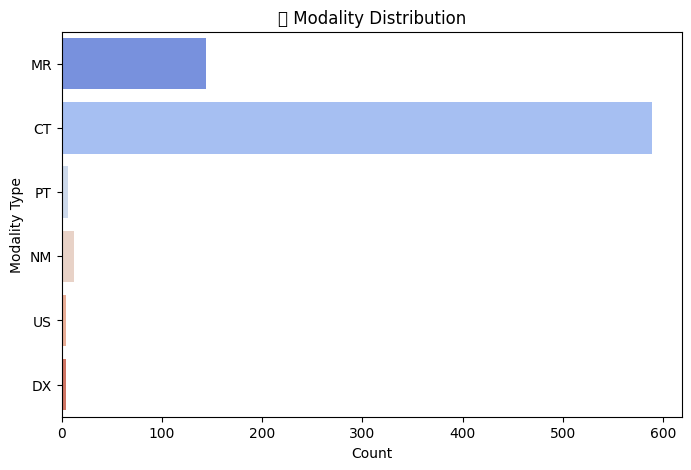

In [30]:

# 📌 Step 4: Modality Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y=df['Modality'], palette='coolwarm')
plt.title("📊 Modality Distribution")
plt.xlabel("Count")
plt.ylabel("Modality Type")
plt.show()


###  📌 Image Count Distribution


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


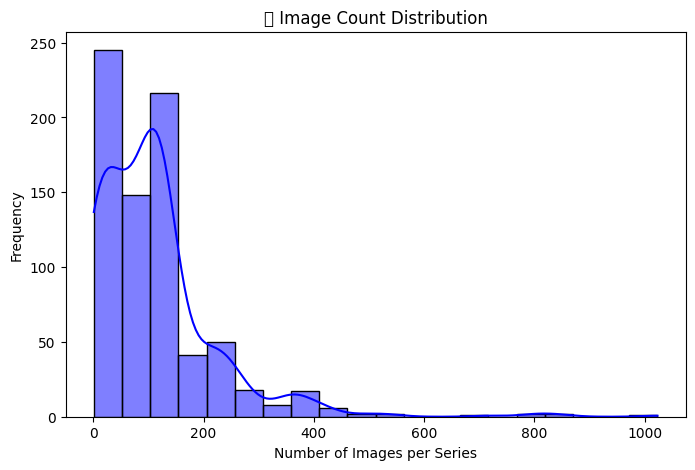

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df['ImageCount'], bins=20, kde=True, color='blue')
plt.title("🖼️ Image Count Distribution")
plt.xlabel("Number of Images per Series")
plt.ylabel("Frequency")
plt.show()


### 📌 Visualizing a Sample DICOM Image

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


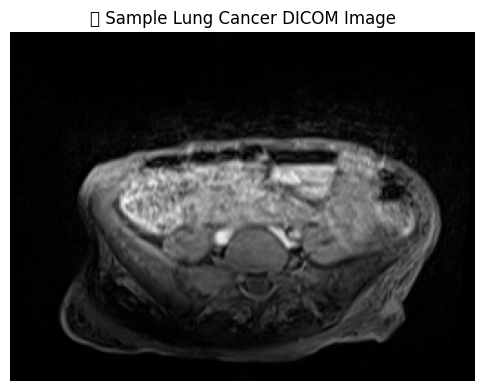

In [32]:
if not df.empty:
    sample_series_uid = df.iloc[0]["SeriesInstanceUID"]
    IMAGE_URL = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getImage"
    params = {"SeriesInstanceUID": sample_series_uid}

    response = requests.get(IMAGE_URL, params=params, stream=True)

    if response.status_code == 200:
        zip_file = ZipFile(io.BytesIO(response.content))
        dicom_files = [f for f in zip_file.namelist() if f.endswith(".dcm")]

        if dicom_files:
            with zip_file.open(dicom_files[0]) as dicom_file:
                dicom_data = pydicom.dcmread(io.BytesIO(dicom_file.read()))
                plt.figure(figsize=(6, 6))
                plt.imshow(dicom_data.pixel_array, cmap="gray")
                plt.title("🩺 Sample Lung Cancer DICOM Image")
                plt.axis("off")
                plt.show()
        else:
            print("⚠️ No DICOM images found in the downloaded ZIP file.")
    else:
        print(f"❌ Error retrieving DICOM images: {response.status_code}")


# **3. 🖼️ DATA VISUALIZATION**

### ✅ Import Libraries

In [39]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydicom
import numpy as np
import io
from PIL import Image, ImageEnhance
from zipfile import ZipFile
import cv2  # OpenCV for edge detection

###  📌 Get the Series Data from TCIA API


In [40]:
BASE_URL = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getSeries"
COLLECTION = "CMB-LCA"

# Query Series Information
params = {"Collection": COLLECTION}
response = requests.get(BASE_URL, params=params)

if response.status_code == 200:
    series_list = response.json()
    print(f"✅ Successfully retrieved {len(series_list)} series from '{COLLECTION}' collection.")
else:
    print(f"❌ Error retrieving series: {response.status_code}")
    series_list = []

# Convert to Pandas DataFrame
df = pd.DataFrame(series_list)

✅ Successfully retrieved 759 series from 'CMB-LCA' collection.


### 📌 Modality Distribution

<ipython-input-41-748fca840b89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Modality'], palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


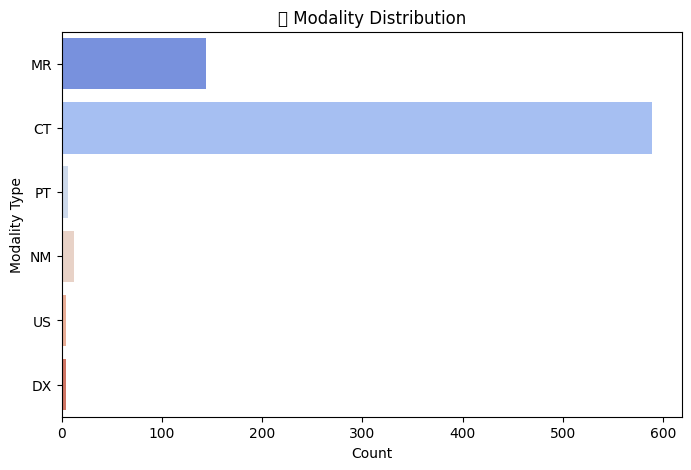

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['Modality'], palette='coolwarm')
plt.title("📊 Modality Distribution")
plt.xlabel("Count")
plt.ylabel("Modality Type")
plt.show()

### 📌 Image Count Distribution

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


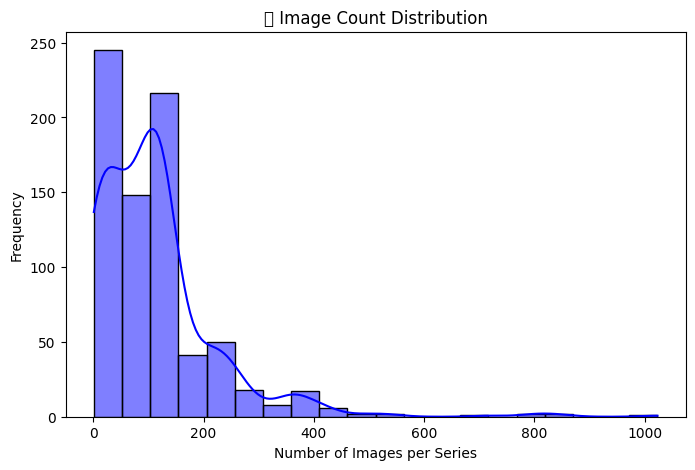

In [42]:

plt.figure(figsize=(8, 5))
sns.histplot(df['ImageCount'], bins=20, kde=True, color='blue')
plt.title("🖼️ Image Count Distribution")
plt.xlabel("Number of Images per Series")
plt.ylabel("Frequency")
plt.show()

### 📌 Series Per Patient Distribution

<ipython-input-43-ed4344d908d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['PatientID'].value_counts(), palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129659 (\N{X-RAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


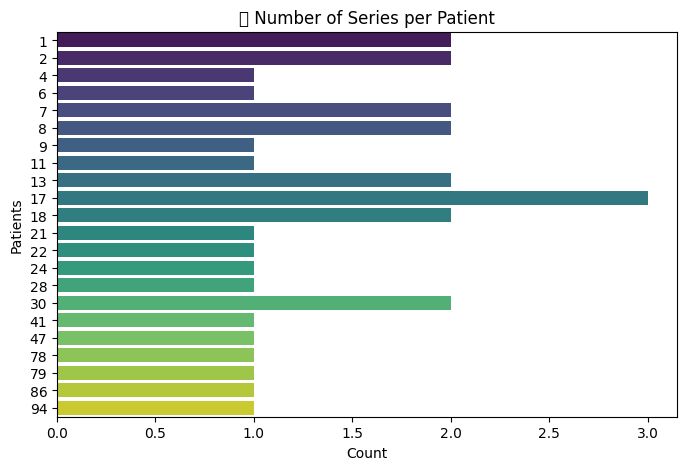

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['PatientID'].value_counts(), palette='viridis')
plt.title("🩻 Number of Series per Patient")
plt.xlabel("Count")
plt.ylabel("Patients")
plt.show()

### 📌 Heatmap of Numleric Data Correlation

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


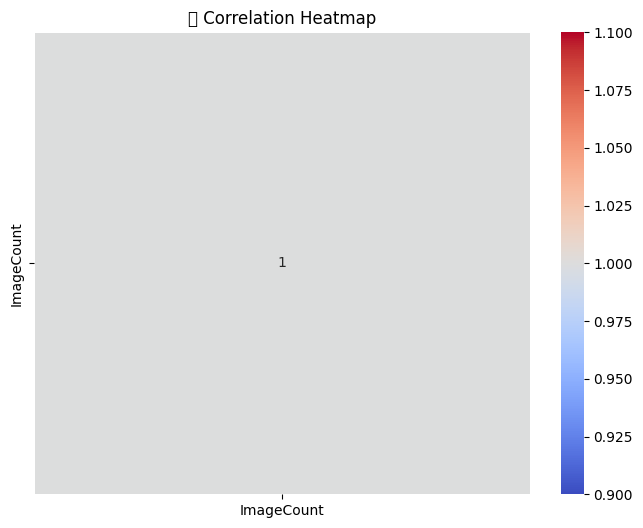

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['ImageCount']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("📈 Correlation Heatmap")
plt.show()

### 📌 Display & Process a sample DICOM Image

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


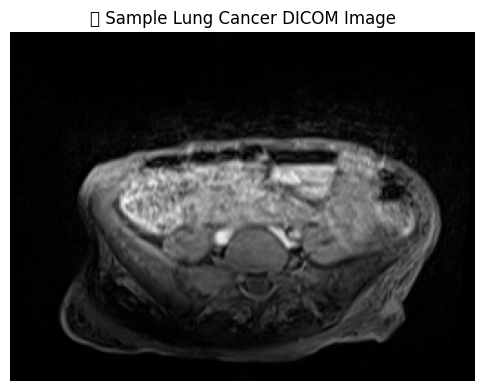

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


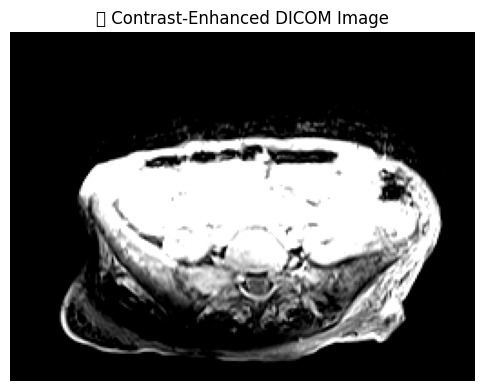

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


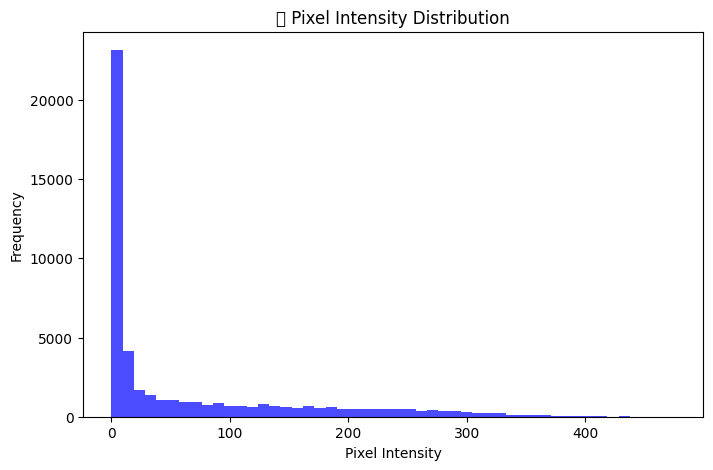

In [45]:
if not df.empty:
    sample_series_uid = df.iloc[0]["SeriesInstanceUID"]
    IMAGE_URL = "https://services.cancerimagingarchive.net/services/v4/TCIA/query/getImage"
    params = {"SeriesInstanceUID": sample_series_uid}

    response = requests.get(IMAGE_URL, params=params, stream=True)

    if response.status_code == 200:
        zip_file = ZipFile(io.BytesIO(response.content))
        dicom_files = [f for f in zip_file.namelist() if f.endswith(".dcm")]

        if dicom_files:
            with zip_file.open(dicom_files[0]) as dicom_file:
                dicom_data = pydicom.dcmread(io.BytesIO(dicom_file.read()))
                image_array = dicom_data.pixel_array

                # 🖼️ **Original Image**
                plt.figure(figsize=(6, 6))
                plt.imshow(image_array, cmap="gray")
                plt.title("🩺 Sample Lung Cancer DICOM Image")
                plt.axis("off")
                plt.show()

                # 🎚️ **Contrast Enhancement**
                # Convert NumPy array to PIL Image and ensure it's in grayscale mode ('L')
                pil_image = Image.fromarray(image_array).convert("L")

                # Contrast Enhancement
                enhancer = ImageEnhance.Contrast(pil_image)
                contrast_image = enhancer.enhance(2.0)  # Increase contrast

                # Display the enhanced image
                plt.figure(figsize=(6, 6))
                plt.imshow(contrast_image, cmap="gray")
                plt.title("🔬 Contrast-Enhanced DICOM Image")
                plt.axis("off")
                plt.show()


                # 📊 **Pixel Intensity Histogram**
                plt.figure(figsize=(8, 5))
                plt.hist(image_array.flatten(), bins=50, color='blue', alpha=0.7)
                plt.title("📏 Pixel Intensity Distribution")
                plt.xlabel("Pixel Intensity")
                plt.ylabel("Frequency")
                plt.show()


### 📌 Edge Detection (Canny)

In [ ]:
import cv2  # Make sure OpenCV is installed

# Convert the image to 8-bit for OpenCV processing
image_8bit = cv2.normalize(image_array, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# 🖥️ **Edge Detection (Canny)**
edges = cv2.Canny(image_8bit, 30, 100)

# Display the edges
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap="gray")
plt.title("⚡ Canny Edge Detection on DICOM Image")
plt.axis("off")
plt.show()

### 📌 Display a grid of images

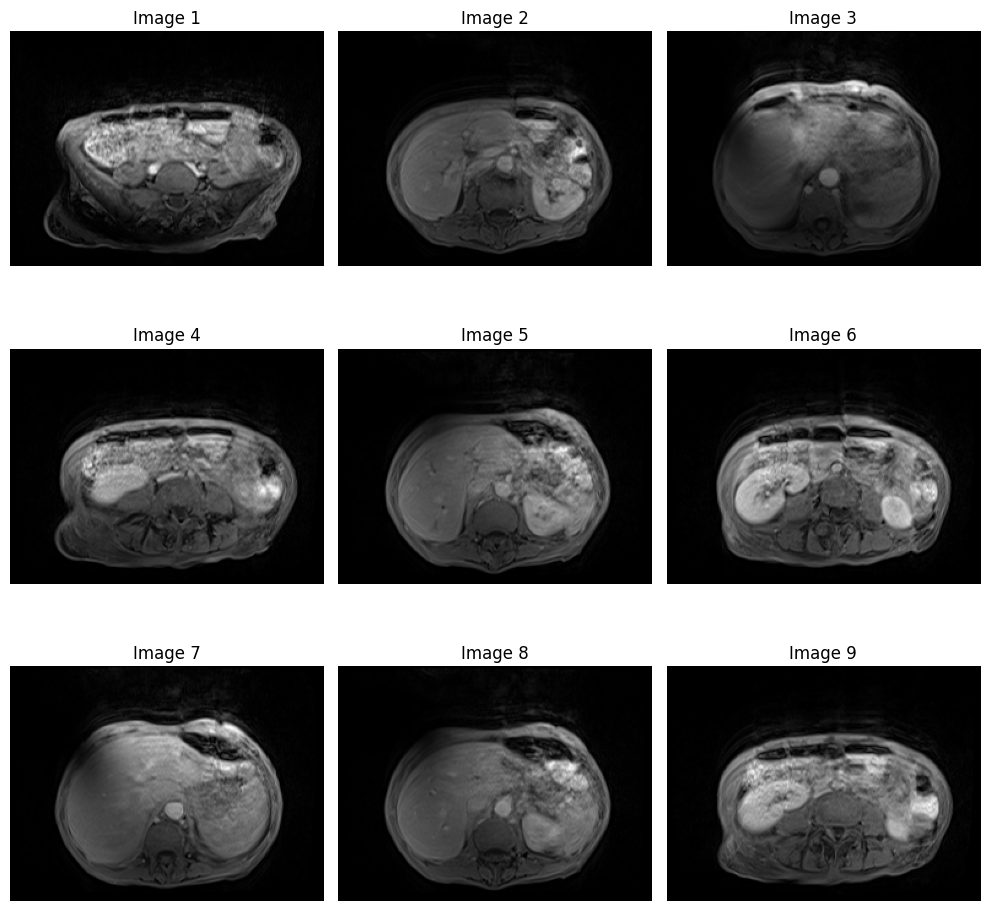

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Select first 9 images
num_images = min(9, len(dicom_files))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        dicom_path = os.path.join(extract_path, dicom_files[i])
        dicom_data = pydicom.dcmread(dicom_path)
        ax.imshow(dicom_data.pixel_array, cmap="gray")
        ax.set_title(f"Image {i+1}")
        ax.axis("off")

plt.tight_layout()
plt.show()